In [132]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
punta arenas cl
ushuaia ar
urubamba pe
arraial do cabo br
vao nc
nizhneyansk ru
fortuna us
sebastian us
preobrazheniye ru
cape town za
ushuaia ar
tsihombe mg
punta arenas cl
porto belo br
rikitea pf
kodiak us
dikson ru
mitu co
georgetown sh
norman wells ca
tuatapere nz
tual id
baijiantan cn
luderitz na
hami cn
bredasdorp za
punta arenas cl
kadykchan ru
seoul kr
northam au
rikitea pf
lebu cl
rikitea pf
vanimo pg
grand river south east mu
sao filipe cv
hofn is
pisco pe
kapaa us
mount gambier au
bolungarvik is
longyan cn
saint-philippe re
emerald au
karratha au
ushuaia ar
ushuaia ar
bocaiuva br
rikitea pf
lakatoro vu
kodiak us
peace river ca
porbandar in
avarua ck
puerto ayora ec
coahuayana mx
tiksi ru
arraial do cabo br
lavrentiya ru
punta arenas cl
taolanaro mg
butaritari ki
victoria sc
castro cl
ibate br
saskylakh ru
virginia beach us
mataura pf
puerto leguizamo co
tuktoyaktuk ca
tasiilaq gl
airai pw
te kauwhata nz
nelson bay au
coos bay us
yellowknife ca
tuktoyaktuk ca
riki

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | urubamba
Processing Record 5 of Set 13 | arraial do cabo
Processing Record 6 of Set 13 | vao
Processing Record 7 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 13 | fortuna
Processing Record 9 of Set 13 | sebastian
Processing Record 10 of Set 13 | preobrazheniye
Processing Record 11 of Set 13 | cape town
Processing Record 12 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 13 | porto belo
Processing Record 14 of Set 13 | kodiak
Processing Record 15 of Set 13 | dikson
Processing Record 16 of Set 13 | mitu
Processing Record 17 of Set 13 | georgetown
Processing Record 18 of Set 13 | norman wells
Processing Record 19 of Set 13 | tuatapere
Processing Record 20 of Set 13 | tual
Processing Record 21 of Set 13 | baijianta

In [137]:
len(city_data)

555

In [138]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.13,77,43,7.56,PF,2021-12-14 00:18:55
1,Punta Arenas,-53.1500,-70.9167,50.11,62,75,12.66,CL,2021-12-14 00:18:56
2,Ushuaia,-54.8000,-68.3000,44.26,70,75,19.57,AR,2021-12-14 00:18:56
3,Urubamba,-13.3047,-72.1158,65.30,84,100,5.44,PE,2021-12-14 00:18:56
4,Arraial Do Cabo,-22.9661,-42.0278,78.66,94,20,4.61,BR,2021-12-14 00:18:57
5,Vao,-22.6667,167.4833,76.95,89,100,19.69,NC,2021-12-14 00:18:57
6,Fortuna,40.5982,-124.1573,48.65,95,1,1.99,US,2021-12-14 00:18:58
7,Sebastian,35.1668,-94.2669,58.05,52,7,5.08,US,2021-12-14 00:18:58
8,Preobrazheniye,42.9019,133.9064,27.88,58,1,6.35,RU,2021-12-14 00:18:58
9,Cape Town,-33.9258,18.4232,63.88,68,20,5.01,ZA,2021-12-14 00:18:59


In [139]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [140]:
city_data_df_order=city_data_df[new_column_order]
city_data_df_order

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-14 00:18:55,-23.1203,-134.9692,78.13,77,43,7.56
1,Punta Arenas,CL,2021-12-14 00:18:56,-53.1500,-70.9167,50.11,62,75,12.66
2,Ushuaia,AR,2021-12-14 00:18:56,-54.8000,-68.3000,44.26,70,75,19.57
3,Urubamba,PE,2021-12-14 00:18:56,-13.3047,-72.1158,65.30,84,100,5.44
4,Arraial Do Cabo,BR,2021-12-14 00:18:57,-22.9661,-42.0278,78.66,94,20,4.61
...,...,...,...,...,...,...,...,...,...
550,Kem,RU,2021-12-14 00:34:16,64.9555,34.5793,23.56,95,80,7.87
551,Monte Patria,CL,2021-12-14 00:34:16,-30.6919,-70.9467,65.17,52,0,4.16
552,Tilichiki,RU,2021-12-14 00:34:17,60.4667,166.1000,14.50,79,100,24.54
553,Molina,CL,2021-12-14 00:34:17,-35.1167,-71.2833,69.53,37,60,8.05


In [141]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [142]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

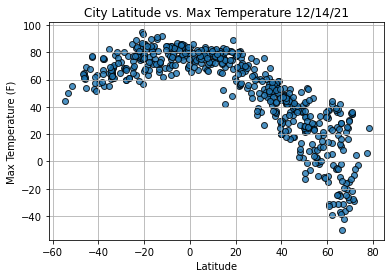

In [143]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

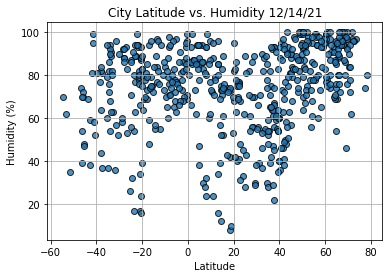

In [144]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

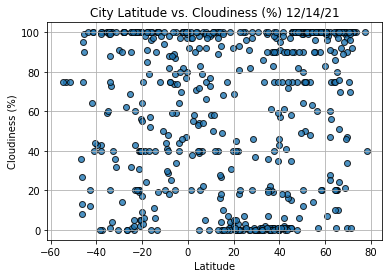

In [145]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

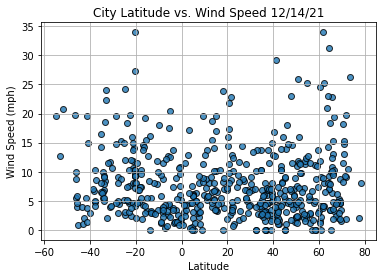

In [146]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [212]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [213]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show


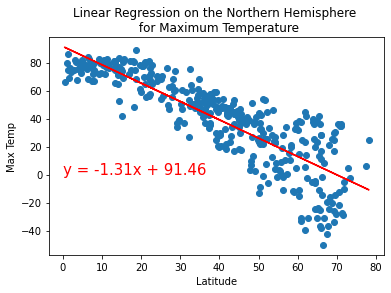

In [214]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

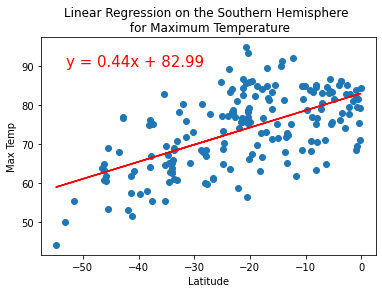

In [215]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-53,90))

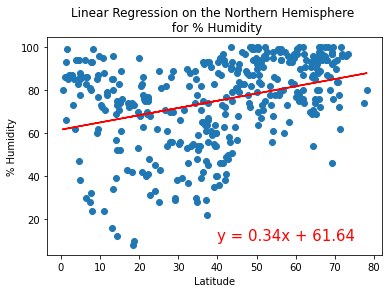

In [216]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

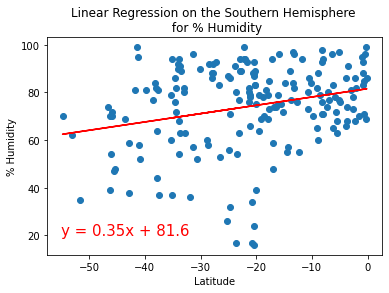

In [217]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,20))

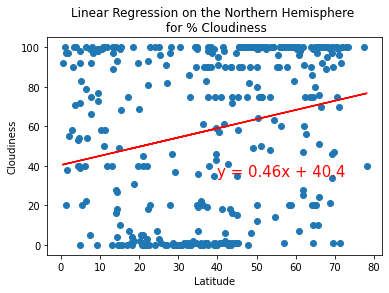

In [218]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(40, 35))

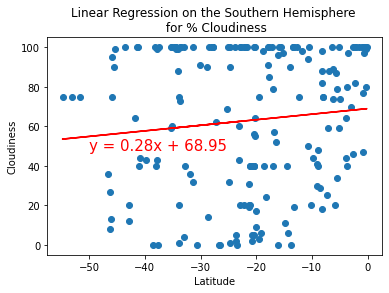

In [219]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,48))

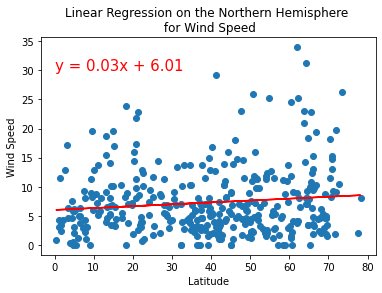

In [223]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

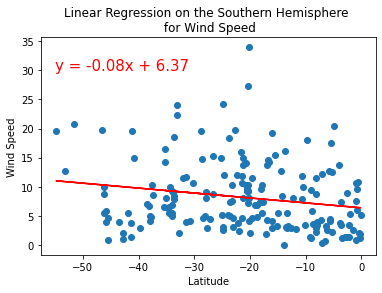

In [225]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,30))